<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/NYC_taxi_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/data

/content/gdrive/My Drive/data


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pip install -U pyarrow

Requirement already up-to-date: pyarrow in /usr/local/lib/python3.6/dist-packages (0.13.0)


In [0]:
# read data
df_train =pd.read_feather('nyc_taxi_data_raw.feather')

In [6]:
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
fare_amount          float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.5 GB


In [8]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,8.077921e+00,-3.875290e+01,1.937328e+01,-3.875261e+01,1.937341e+01,1.685380e+00
std,2.055127e+01,2.556202e+01,1.414234e+01,2.553839e+01,1.412191e+01,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


### fare_amonut 

- 값이 음수가 존재하는 일부 데이터-> remove
- 평균 8.077
- 표준편차 20.55



In [6]:
print('Old data : %d'  %len(df_train))

df_train = df_train[df_train.fare_amount>=0]

print('New data : %d'  %len(df_train))

Old data : 55423856
New data : 55421402


Text(0.5, 1.0, 'Histogram')

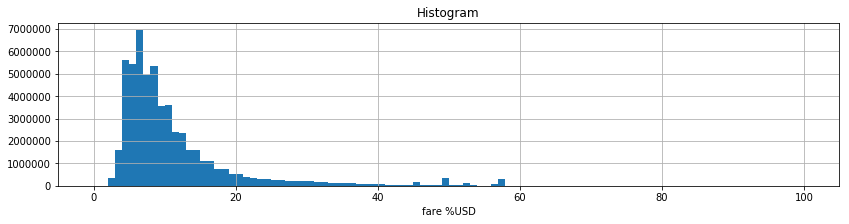

In [0]:
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100,figsize=(14,3))
plt.xlabel('fare %USD')
plt.title('Histogram')

In [0]:
print(df_train.isnull().sum())

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64


In [7]:
print('Old data : %d'  %len(df_train))

df_train = df_train.dropna(how='any' ,axis = 'rows')

print('New data : %d'  %len(df_train))

Old data : 55421402
New data : 55421026


In [0]:
df_test = pd.read_csv('test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [0]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


New York city coordinates are (https://www.travelmath.com/cities/New+York,+NY):

- longitude = -74.0063889
- lattitude = 40.7141667


In [0]:
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [0]:
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [0]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
                (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
                (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
                (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [0]:
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [9]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old data : %d'  %len(df_train))

df_train = df_train[select_within_boundingbox(df_train,BB)]

print('New data : %d'  %len(df_train))

Old data : 55421026
New data : 54246832


In [0]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

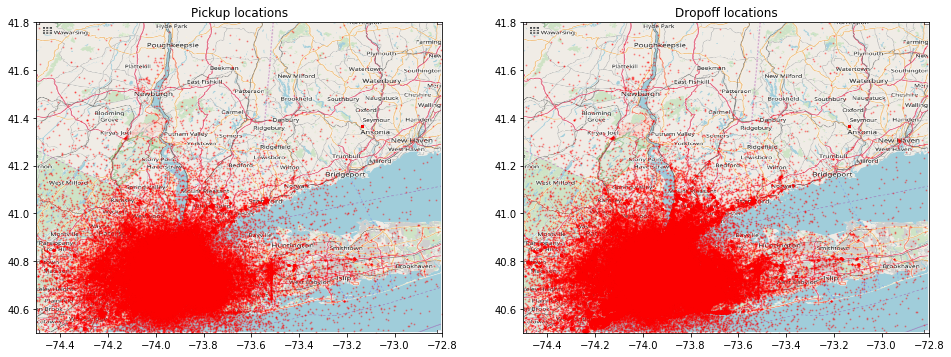

In [0]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

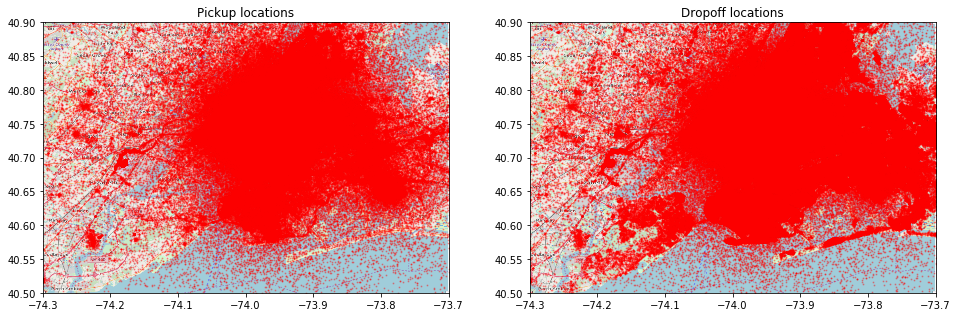

In [0]:
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

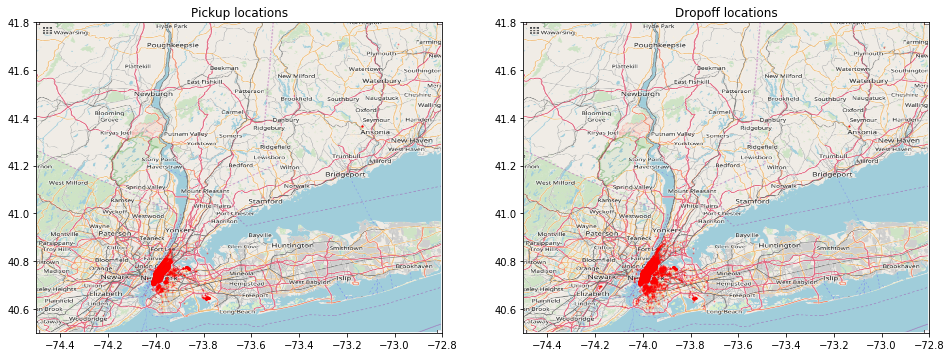

In [0]:
plot_on_map(df_test, BB, nyc_map, s=1, alpha=0.3)

## pickup traffic density




In [0]:
df_train['year'] = df_train.pickup_datetime.apply(lambda t: t.year)
df_train['weekday'] = df_train.pickup_datetime.apply(lambda t: t.weekday)
df_train['hour'] = df_train.pickup_datetime.apply(lambda t: t.hour)

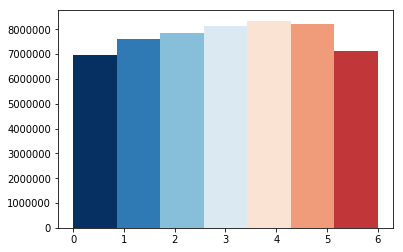

In [15]:
cm = plt.cm.RdBu_r


n, bins ,patches =  plt.hist(df_train['weekday'],bins=7, color='orange')

for i,p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/7))

    
plt.show()

- 0 : 월요일
- 6 : 일요일

In [16]:
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour
0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841614,40.712276,1,2009,0,17
1,16.9,2010-01-05 16:52:00+00:00,-74.016045,40.711304,-73.979271,40.782005,1,2010,1,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2,2011,3,0
3,7.7,2012-04-21 04:30:00+00:00,-73.987129,40.733143,-73.991570,40.758091,1,2012,5,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1,2010,1,7


## Distance pickup - dropoff

- haversine formula
https://en.wikipedia.org/wiki/Haversine_formula


```
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) #2*R*asin...
```




In [0]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [0]:
df_train['distance_miles'] = distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                                            df_train.dropoff_latitude,df_train.dropoff_longitude)

count    5.424683e+07
mean     2.067101e+00
std      2.337619e+00
min      0.000000e+00
25%      7.787320e-01
50%      1.337584e+00
75%      2.429150e+00
max      8.937456e+01
Name: distance_miles, dtype: float64

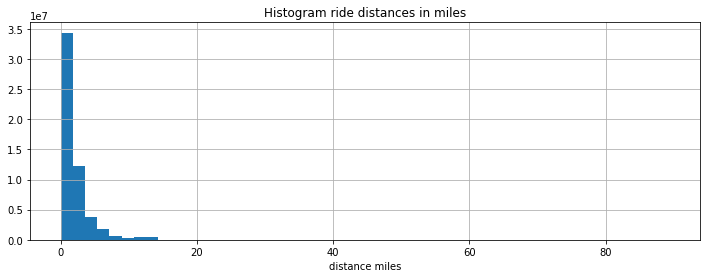

In [18]:
df_train.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
df_train.distance_miles.describe()

## Distance from NYC center

In [0]:
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [0]:
df_train['distance_to_center'] = distance(nyc[1],nyc[0], \
                                                            df_train.pickup_latitude, df_train.pickup_longitude)

In [21]:
df_train[(df_train.passenger_count>=9) | (df_train.passenger_count == 0)].groupby('passenger_count').count()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,weekday,hour,distance_miles,distance_to_center
passenger_count,,,,,,,,,,,
0,190840,190840,190840,190840,190840,190840,190840,190840,190840,190840,190840
9,21,21,21,21,21,21,21,21,21,21,21
129,2,2,2,2,2,2,2,2,2,2,2
208,22,22,22,22,22,22,22,22,22,22,22


In [22]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

,distance_miles,fare_amount
passenger_count,,
0,1.760306,8.963568
1,2.037691,11.193254
2,2.182758,11.813754
3,2.102505,11.520367
4,2.136645,11.741974
5,2.073011,11.209891
6,2.108609,12.124616
7,3.211636,35.679230
8,2.176650,37.047142


In [23]:
print("Average $USD/Mile : {:0.2f}".format(df_train.fare_amount.sum()/df_train.distance_miles.sum()))

Average $USD/Mile : 5.48


Text(0.5, 1.0, 'Zoom in on distance <15 mile , fare < $100')

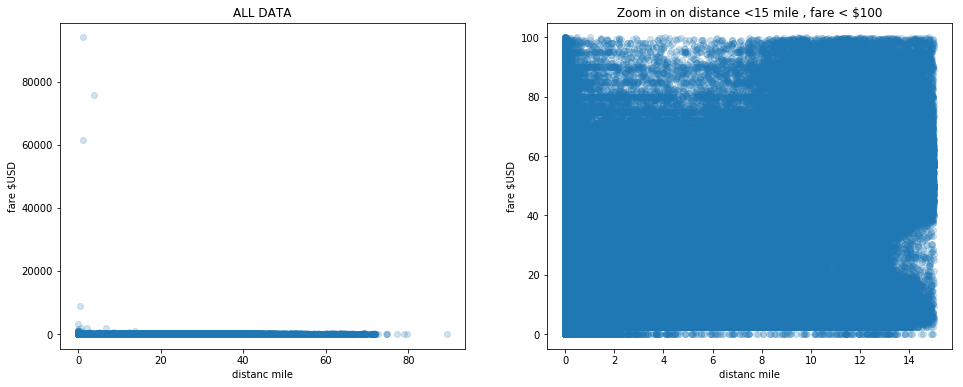

In [0]:
fig, axs = plt.subplots(1,2,figsize = (16,6))

axs[0].scatter(df_train.distance_miles,df_train.fare_amount, alpha =0.2)
axs[0].set_xlabel('distanc mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('ALL DATA')

idx = (df_train.distance_miles<15) & (df_train.fare_amount < 100)
axs[1].scatter(df_train[idx].distance_miles,df_train[idx].fare_amount, alpha =0.2)
axs[1].set_xlabel('distanc mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance <15 mile , fare < $100')

In [0]:
# remove datapoints with distance < 0.05 miles

idx = (df_train.distance_miles>=0.05)

In [17]:
print('Old data : %d'  %len(df_train))

df_train = df_train[idx]

print('New data : %d'  %len(df_train))

Old data : 54246832
New data : 53385143


In [0]:
del idx

## Passenger_count 
- 9이상의 값 : 45개 존재 -> 삭제
- 0 인 값 : 190840 개 존재 -> 적은 수의 값은 아니지만 전체 데이터의 0.3%로 임의로 삭제

In [19]:
print('Old data : %d'  %len(df_train))

df_train = df_train[df_train.passenger_count < 9]
df_train = df_train[df_train.passenger_count != 0]

print('New data : %d'  %len(df_train))

Old data : 53385143
New data : 53196278


In [30]:
df_train[(df_train.passenger_count>=9) | (df_train.passenger_count == 0)].groupby('passenger_count').count()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,weekday,hour,distance_miles,distance_to_center
passenger_count,,,,,,,,,,,


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53196278 entries, 0 to 55423855
Data columns (total 12 columns):
fare_amount           float32
pickup_datetime       datetime64[ns, UTC]
pickup_longitude      float32
pickup_latitude       float32
dropoff_longitude     float32
dropoff_latitude      float32
passenger_count       uint8
year                  int64
weekday               int64
hour                  int64
distance_miles        float64
distance_to_center    float64
dtypes: datetime64[ns, UTC](1), float32(5), float64(2), int64(3), uint8(1)
memory usage: 3.8 GB


In [0]:
df_train.reset_index(inplace=True) 

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53196278 entries, 0 to 53196277
Data columns (total 13 columns):
index                 int64
fare_amount           float32
pickup_datetime       datetime64[ns, UTC]
pickup_longitude      float32
pickup_latitude       float32
dropoff_longitude     float32
dropoff_latitude      float32
passenger_count       uint8
year                  int64
weekday               int64
hour                  int64
distance_miles        float64
distance_to_center    float64
dtypes: datetime64[ns, UTC](1), float32(5), float64(2), int64(4), uint8(1)
memory usage: 3.8 GB


In [0]:
df_train.to_feather('nyc_taxi_train_cleaning_data.feather')

## Test feature 

In [0]:
df_test['distance_miles'] =distance(df_test.pickup_latitude, df_test.pickup_longitude, \
                                                            df_test.dropoff_latitude,df_test.dropoff_longitude)

df_test['distance_to_center'] = distance(nyc[1],nyc[0], \
                                                            df_test.pickup_latitude, df_test.pickup_longitude)

df_test['year'] = df_test.pickup_datetime.apply(lambda t: t.year)
df_test['weekday'] = df_test.pickup_datetime.apply(lambda t: t.weekday)
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: t.hour)


In [0]:
feature = ['year', 'hour', 'weekday', 'distance_miles','passenger_count']